<div align="center">

# **Personalisierte Ernährung zur Prävention ernährungsbedingter Krankheiten**

<br>

**Gruppe 5**  
Flavia De Solda, Kay Sheppard, Murat Ayhekim, Adrian Martic, Adrian Wegmann  
<br>
FFHS / BFH / HSLU und OST  
Master of Science in Wirtschaftsinformatik  
<br>
**März 2025**

</div>

---

##  Erklärung

Wir erklären hiermit, dass wir die vorliegende Arbeit für das Modul **BINA** bzw. die von uns ausgewiesene Leistung **selbständig**, ohne unzulässige Hilfe Dritter und ausschließlich unter Verwendung der angegebenen Quellen verfasst bzw. erbracht haben.

Zur sprachlichen Überprüfung, zur besseren Verständlichkeit der Zusammenhänge sowie zur Sicherstellung eines konsistenten roten Fadens wurde unterstützend ein KI-Tool eingesetzt.

<div align="right">Zürich, 13.06.2025</div>  
<div align="right">Die unterschriebene Selbständigkeitserklärung befindet sich im Anhang.</div>

---

##  1. Einleitung

Im Kontext steigender chronischer Erkrankungen wie Typ-2-Diabetes, Bluthochdruck und Adipositas rückt die Frage nach präventiver, individueller Ernährung zunehmend in den Fokus.  
Während Ernährungsempfehlungen in der Vergangenheit vor allem pauschalisiert wurden, erlauben moderne Datenanalysen eine differenzierte Betrachtung individueller Ernährungsbedürfnisse.

Ziel dieser Fallstudie ist es, mithilfe datengetriebener Methoden Erkenntnisse über individuelle Ernährungsmuster und deren Zusammenhang mit Gesundheitszuständen zu gewinnen.

Wir orientieren uns dabei am **CPA-Framework _"From Data to Decisions"_** und fokussieren uns insbesondere auf folgende Schritte:

1. Zieldefinition und Informationsbedarf  
2. Datenerhebung und -integration  
3. Datenanalyse  
4. Kommunikation der Erkenntnisse für Entscheider

---

##  2. Analyse

###  2.1 Hauptziel

#### **Strategisches Ziel**

Das strategische Ziel dieser Case Study ist es, herauszufinden, wie datenbasierte, personalisierte Ernährungsempfehlungen zur Reduktion ernährungsbedingter Krankheitsrisiken generiert werden können.  
Diese Erkenntnisse sollen unter anderem als Basis für ein potenzielles digitales Geschäftsmodell im Ernährungsbereich dienen.

#### **Zielgruppen**

- Gesundheitsbewusste Konsument:innen mit spezifischen Bedürfnissen  
- Start-ups / Unternehmen im Bereich Digital Health & Nutrition  
- Ernährungsberater:innen, die datenunterstützt Empfehlungen geben möchten

#### **Vorgehen (CPA)**

> Es wird dem CPA-Vorgehen _„From Data to Decisions“_ gefolgt:

- **Schritt 1**: Ziele und Informationsbedarf definieren  
- **Schritt 2**: Daten erheben  
- **Schritt 3**: Daten analysieren  
- **Schritt 4**: Informationen präsentieren  
- **Schritt 5**: Datenbasierte Entscheidungen treffen


###  2.2 Schritt 1: Ziele & Informationsbedarf

| **KAQ Nr.** | **Key Analytics Question** | **Daten** | **Vorgehen / Schritte** |
|------------:|----------------------------|-----------|--------------------------|
| 1 | Welche Ernährungsmuster lassen sich aus individuellen Makronährstoffprofilen ableiten – und welche Krankheitsrisiken sind damit verbunden? | `detailed_meals_macros_CLEANED.csv` | Clustering, Krankheitsverteilung, Interpretation |
| 2 | In welchen Ernährungsmustern liegt eine potenziell unausgewogene Nährstoffzufuhr vor (z. B. zu wenig Protein, zu viel Zucker)? | `detailed_meals_macros_CLEANED.csv` | Vergleich mit Referenzwerten (z. B. BLV) |
| 3 | Wie unterscheiden sich Personen mit und ohne Krankheit in Bezug auf ihre Ernährung? | `detailed_meals_macros_CLEANED.csv` | Gruppierung, Mittelwertvergleich, Visualisierung |
| 4 | Welche Nährstoffe sollten bei bestimmten Krankheiten laut offiziellen Empfehlungen (z. B. BLV) besonders berücksichtigt werden? | `Nutrient_requirements_CH.xlsx`, `Food_and_Nutrition__.csv` | Mapping: Krankheit → Nährstoffe → Lebensmittel |

---

###  2.3 Schritt 2: Daten erheben & kombinieren

- Vorverarbeitung und Normalisierung der CSV-Daten  
- Verknüpfung von Mahlzeitenprofilen mit Krankheitsangaben  
- Matching von Mahlzeiten mit Einzellebensmitteln (Food & Nutrition)

---

###  2.4 Schritt 3: Analyse

- Clusteranalyse typischer Ernährungsmuster (z. B. _High Sugar / Low Fiber_)  
- Korrelation dieser Cluster mit Krankheitsprävalenzen  
- Vergleich mit WHO-Zielwerten (Zielerreichung, Delta-Analyse)  
- Optional: Machine Learning zur Risikoprofil-Vorhersage

---

###  2.5 Schritt 4: Kommunikation für Entscheider

- Visualisierung der Resultate (Dashboards, Diagramme)  
- Empfehlungen je Zielgruppe  
- Ableitung konkreter Maßnahmen oder Produktideen

---

##  3. Datenmanagement & Datensammlung

###  3.1 Datenquellen

#### **Verwendete Datensätze**

1. **Detailed Meals Macros CLEANED** (Kaggle)  
   - Personenbezogene Merkmale: Alter, Geschlecht, Grösse, Gewicht, Aktivitätslevel  
   - Nährwertprofile der Mahlzeiten (Frühstück, Mittagessen, Abendessen, Snacks)  
   - Krankheitsstatus (z. B. Hypertension, Diabetes, Weight Gain)

2. **Food and Nutrition Dataset** (Kaggle)  
   - Nährwerte einzelner Lebensmittel (Makros & Mikros)  
   - Ermöglicht detaillierte Aufschlüsselung komplexer Mahlzeiten

3. **BLV Schweizer Referenzwerte**  
   - Offizielle Empfehlungen zur idealen Nährstoffzufuhr


In [ ]:
#pip install scikit-learn
#pip install kaggle

In [ ]:
# =====================================
# Schritt 0: Setup & Bibliotheken
# =====================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
# =====================================
# Schritt 1: Daten laden & erste Sichtung
# =====================================

# === Päckli 1: FOOD Nutrition ===
# Lade die Datensätze aus Päckli 1
df_meals = pd.read_csv("https://raw.githubusercontent.com/M2xAy/ffhs-datensaetze/refs/heads/main/Datasets/archive/detailed_meals_macros_CLEANED.csv")
df_nutrition = pd.read_csv("https://raw.githubusercontent.com/M2xAy/ffhs-datensaetze/refs/heads/main/Datasets/archive/Food_and_Nutrition__.csv")
# Vorschau
print("Food meals:")
df_meals.info()
df_meals.head()
print("Food nutrition:")
df_nutrition.info()
df_nutrition.head()




# === Päckli 2: FOOD DATA GROUPS ===
# Lade alle Gruppen-Datensätze
food_data_files = [
    "https://raw.githubusercontent.com/M2xAy/ffhs-datensaetze/refs/heads/main/Datasets/Kaggle/FINAL%20FOOD%20DATASET/FOOD-DATA-GROUP1.csv",
      "https://raw.githubusercontent.com/M2xAy/ffhs-datensaetze/refs/heads/main/Datasets/Kaggle/FINAL%20FOOD%20DATASET/FOOD-DATA-GROUP2.csv",
        "https://raw.githubusercontent.com/M2xAy/ffhs-datensaetze/refs/heads/main/Datasets/Kaggle/FINAL%20FOOD%20DATASET/FOOD-DATA-GROUP3.csv",
          "https://raw.githubusercontent.com/M2xAy/ffhs-datensaetze/refs/heads/main/Datasets/Kaggle/FINAL%20FOOD%20DATASET/FOOD-DATA-GROUP4.csv",
            "https://raw.githubusercontent.com/M2xAy/ffhs-datensaetze/refs/heads/main/Datasets/Kaggle/FINAL%20FOOD%20DATASET/FOOD-DATA-GROUP5.csv",
]# Falls du alle in ein gemeinsames DataFrame packen willst
food_data_dfs = []
for file_url in food_data_files:
    df = pd.read_csv(file_url)
    food_data_dfs.append(df)

# Zusammenfuegen in ein einziges DataFrame
food_groups_combined = pd.concat(food_data_dfs, ignore_index=True)
# Vorschau
print("Food Groups Combined:")
food_groups_combined.info()
food_groups_combined.head()


# Lade die Nährstoff-Referenzwerte der Schweiz
blv_nutrient_requirements = pd.read_csv("https://raw.githubusercontent.com/M2xAy/ffhs-datensaetze/refs/heads/main/Datasets/BLV/Nutrient_requirements_CH-2022.csv")
# Vorschau
print("\nBLV Nutrient Requirements:")
blv_nutrient_requirements.info()
blv_nutrient_requirements.head()

In [ ]:
# =====================================
# Schritt 2: Daten bereinigen
# =====================================

<Axes: xlabel='Calories', ylabel='Count'>

Text(0.5, 1.0, 'Verteilung von Calories')

Text(0.5, 0, 'Calories')

Text(0, 0.5, 'Häufigkeit')

<Axes: xlabel='Protein', ylabel='Count'>

Text(0.5, 1.0, 'Verteilung von Protein')

Text(0.5, 0, 'Protein')

Text(0, 0.5, 'Häufigkeit')

<Axes: xlabel='Fat', ylabel='Count'>

Text(0.5, 1.0, 'Verteilung von Fat')

Text(0.5, 0, 'Fat')

Text(0, 0.5, 'Häufigkeit')

<Axes: xlabel='Sugar', ylabel='Count'>

Text(0.5, 1.0, 'Verteilung von Sugar')

Text(0.5, 0, 'Sugar')

Text(0, 0.5, 'Häufigkeit')

<Axes: xlabel='Sodium', ylabel='Count'>

Text(0.5, 1.0, 'Verteilung von Sodium')

Text(0.5, 0, 'Sodium')

Text(0, 0.5, 'Häufigkeit')

<Axes: xlabel='Carbohydrates', ylabel='Count'>

Text(0.5, 1.0, 'Verteilung von Carbohydrates')

Text(0.5, 0, 'Carbohydrates')

Text(0, 0.5, 'Häufigkeit')

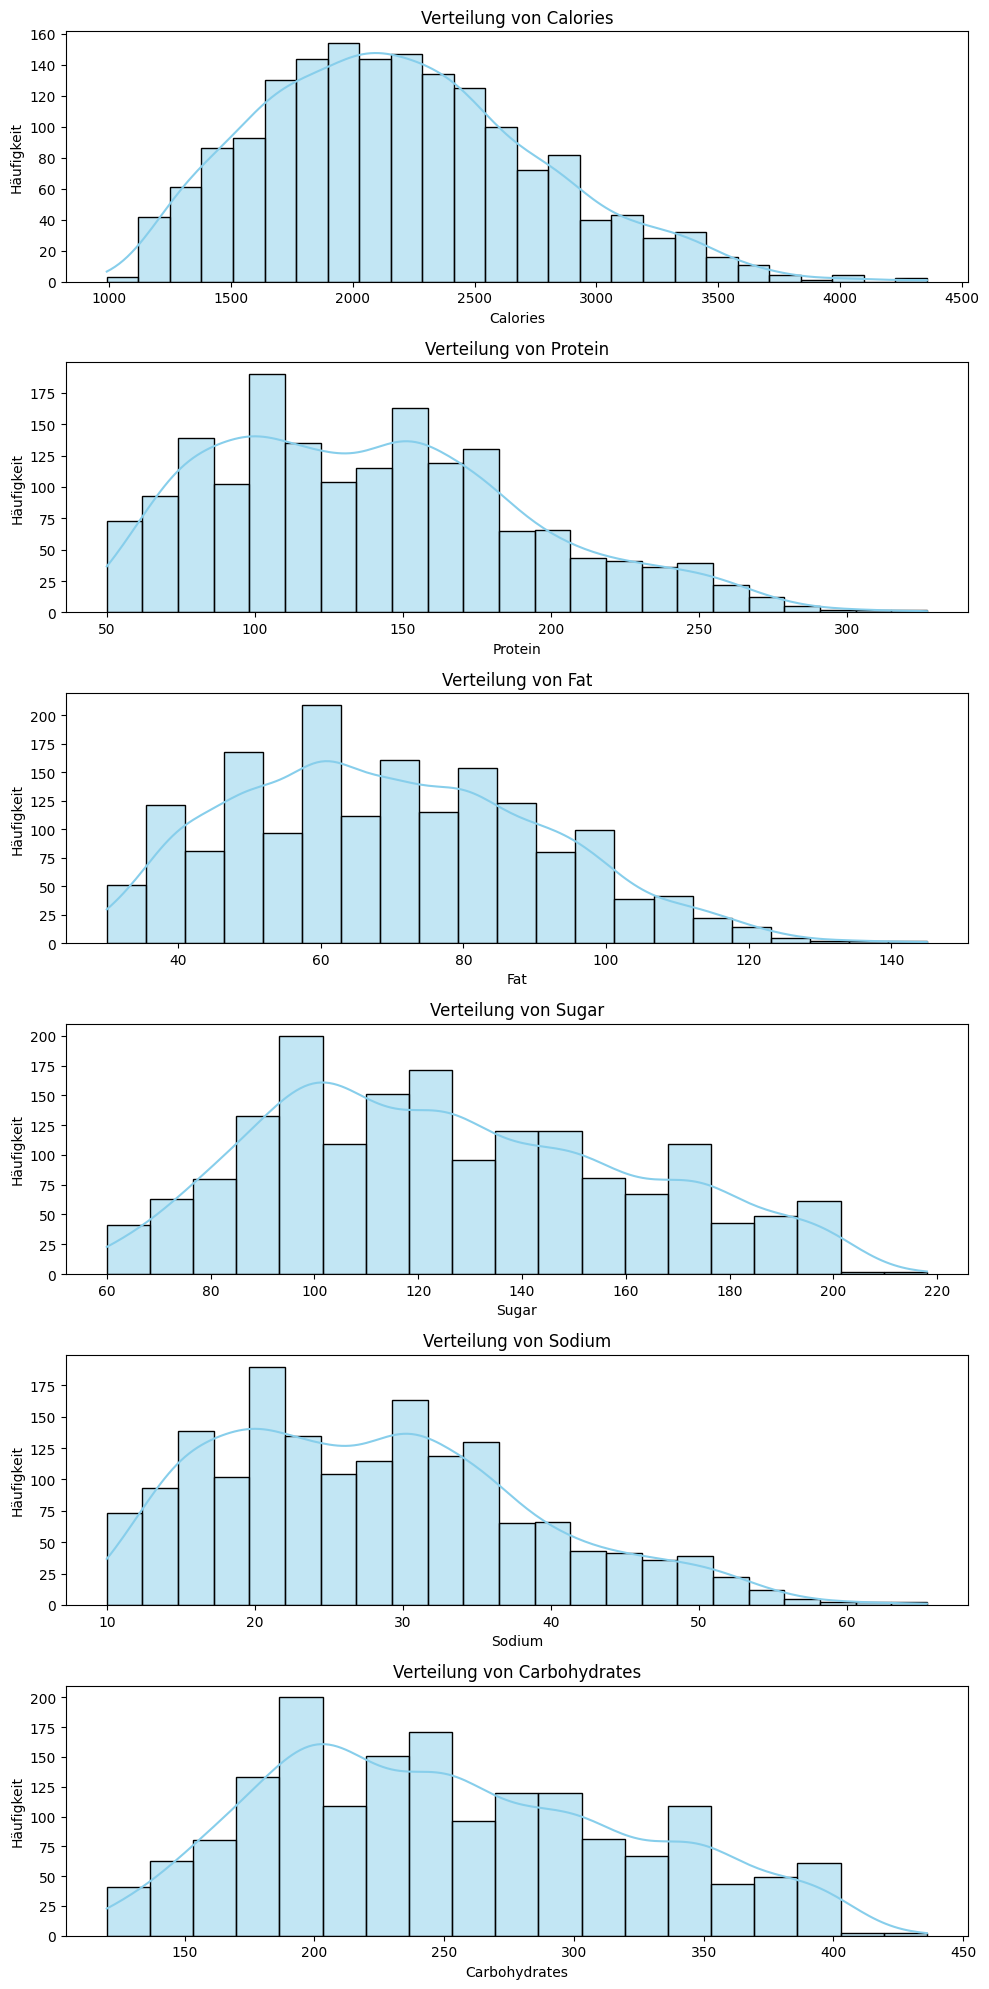

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Disease'>

Text(0.5, 1.0, 'Häufigkeit von Krankheiten (kombiniert)')

Text(0.5, 0, 'Krankheit(en)')

Text(0, 0.5, 'Anzahl Personen')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'Weight Gain'),
  Text(1, 0, 'Weight Gain, Hypertension, Heart Disease'),
  Text(2, 0, 'Weight Gain, Kidney Disease'),
  Text(3, 0, 'Weight Gain, Hypertension, Heart Disease, Kidney Disease'),
  Text(4, 0, 'Diabetes, Acne, Weight Gain, Hypertension, Heart Disease'),
  Text(5, 0, 'Diabetes, Acne, Hypertension, Heart Disease'),
  Text(6, 0, 'Hypertension, Heart Disease'),
  Text(7, 0, 'Diabetes, Acne, Weight Gain, Hypertension, Heart Disease, Kidney Disease'),
  Text(8, 0, 'Hypertension, Heart Disease, Kidney Disease'),
  Text(9, 0, 'Kidney Disease'),
  Text(10, 0, 'Hypertension, Kidney Disease'),
  Text(11, 0, 'Diabetes, Acne, Weight Loss, Hypertension, Heart Disease, Kidney Disease'),
  Text(12, 0, 'Diabetes, Acne, Hypertension, Kidney Disease')])

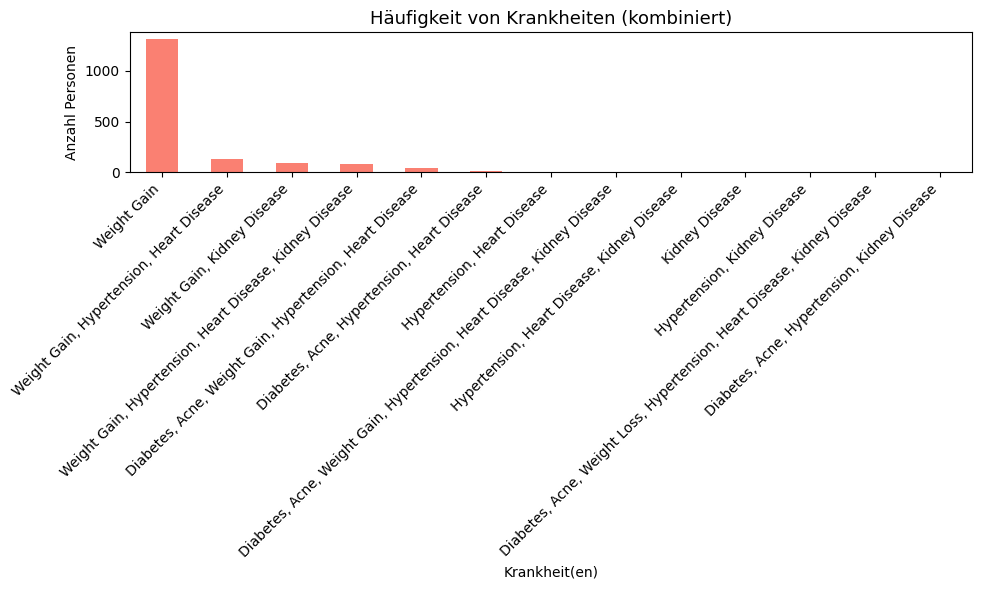

<Figure size 800x600 with 0 Axes>

/var/folders/7f/11912_rn5y34qkv95bl25kvc0000gn/T/ipykernel_92906/1360098585.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_meals, x="Gender", y="Calories", palette="pastel")


<Axes: xlabel='Gender', ylabel='Calories'>

Text(0.5, 1.0, 'Kalorienaufnahme nach Geschlecht')

Text(0.5, 0, 'Geschlecht')

Text(0, 0.5, 'Kalorien')

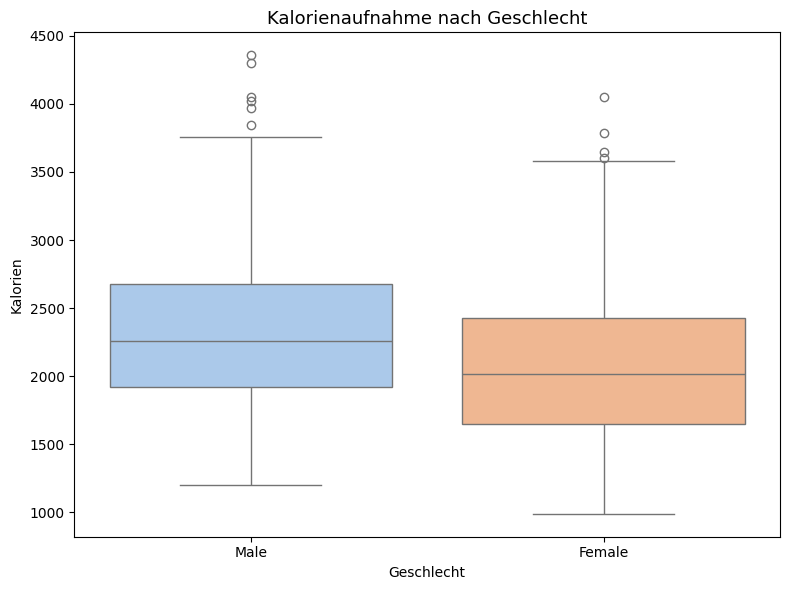

Deskriptive Statistik (inkl. Median, Schiefe & Kurtosis):

                count     mean     std    min      25%     50%      75%  \
Calories       1698.0  2196.44  571.09  990.0  1770.25  2146.0  2549.75   
Protein        1698.0   139.90   53.33   50.0   100.00   136.0   174.00   
Fat            1698.0    69.70   21.43   30.0    52.00    69.0    85.00   
Sugar          1698.0   126.19   34.94   60.0   100.00   124.0   150.00   
Sodium         1698.0    27.98   10.67   10.0    20.00    27.2    34.80   
Carbohydrates  1698.0   252.39   69.88  120.0   200.00   248.0   300.00   

                  max  median  skewness  kurtosis  
Calories       4357.0  2146.0      0.47     -0.11  
Protein         327.0   136.0      0.54     -0.26  
Fat             145.0    69.0      0.35     -0.43  
Sugar           218.0   124.0      0.32     -0.77  
Sodium           65.4    27.2      0.54     -0.26  
Carbohydrates   436.0   248.0      0.32     -0.77  


<Figure size 800x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Korrelation zwischen Makronährstoffen')

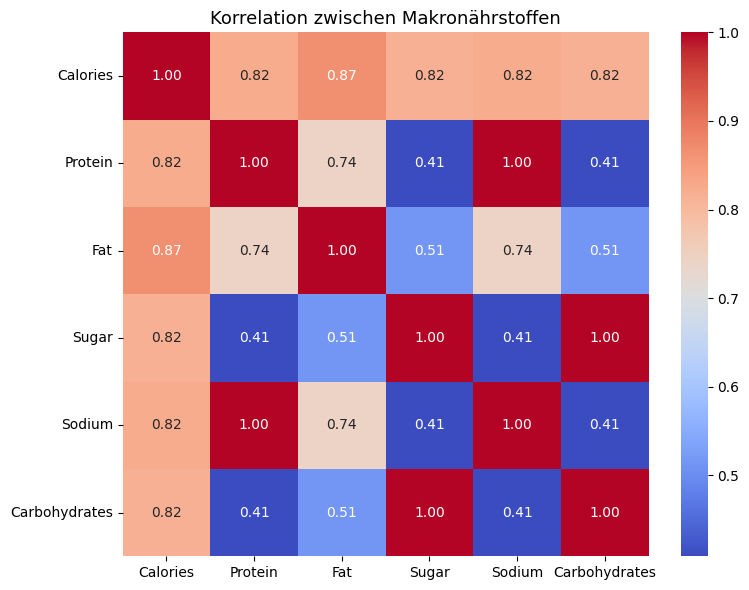

Deskriptive Statistik (inkl. Median, Schiefe & Kurtosis):

                count     mean     std    min      25%     50%      75%  \
Calories       1698.0  2196.44  571.09  990.0  1770.25  2146.0  2549.75   
Protein        1698.0   139.90   53.33   50.0   100.00   136.0   174.00   
Fat            1698.0    69.70   21.43   30.0    52.00    69.0    85.00   
Sugar          1698.0   126.19   34.94   60.0   100.00   124.0   150.00   
Sodium         1698.0    27.98   10.67   10.0    20.00    27.2    34.80   
Carbohydrates  1698.0   252.39   69.88  120.0   200.00   248.0   300.00   

                  max  median  skewness  kurtosis  
Calories       4357.0  2146.0      0.47     -0.11  
Protein         327.0   136.0      0.54     -0.26  
Fat             145.0    69.0      0.35     -0.43  
Sugar           218.0   124.0      0.32     -0.77  
Sodium           65.4    27.2      0.54     -0.26  
Carbohydrates   436.0   248.0      0.32     -0.77  


<Figure size 800x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Korrelation zwischen Makronährstoffen')

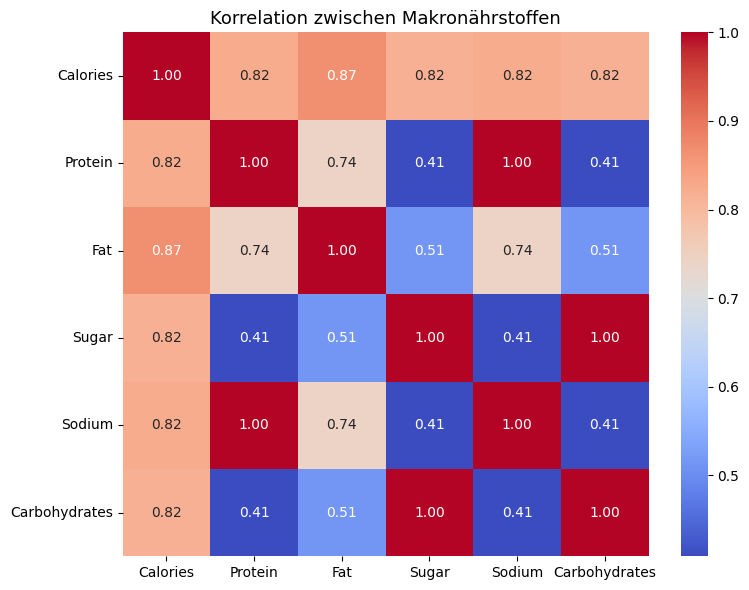

In [ ]:
# =====================================
# Schritt 3: Desktripitve Statistik - Teil 1 Mittelwerte, Verteilungen, Boxplots, Gruppenvergleiche
# =====================================


# ------------------------------
# 3.1.1 Verteilung der Makronährstoffe
# ------------------------------
macro_columns = ["Calories", "Protein", "Fat", "Sugar", "Sodium", "Carbohydrates"]
fig1, axes = plt.subplots(len(macro_columns), 1, figsize=(10, 20))

for i, col in enumerate(macro_columns):
    sns.histplot(df_meals[col], kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f"Verteilung von {col}", fontsize=12)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Häufigkeit")

plt.tight_layout()
plt.show()

# ------------------------------
# 3.1.2 Häufigkeit von Krankheiten
# ------------------------------
plt.figure(figsize=(10, 6))
df_meals["Disease"].value_counts().plot(kind="bar", color="salmon")
plt.title("Häufigkeit von Krankheiten (kombiniert)", fontsize=13)
plt.xlabel("Krankheit(en)")
plt.ylabel("Anzahl Personen")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# ------------------------------
# 3.1.3 Vergleich Kalorienaufnahme nach Geschlecht
# ------------------------------
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_meals, x="Gender", y="Calories", palette="pastel")
plt.title("Kalorienaufnahme nach Geschlecht", fontsize=13)
plt.xlabel("Geschlecht")
plt.ylabel("Kalorien")
plt.tight_layout()
plt.show()




# ------------------------------
# Deskriptive Statistik mit erweiterten Kennzahlen
# ------------------------------
columns = ["Calories", "Protein", "Fat", "Sugar", "Sodium", "Carbohydrates"]
desc_stats = df_meals[columns].describe().T  # count, mean, std, min, 25%, 50%, 75%, max
desc_stats["median"] = df_meals[columns].median()
desc_stats["skewness"] = df_meals[columns].skew()
desc_stats["kurtosis"] = df_meals[columns].kurt()

# Ausgabe als Tabelle
print("Deskriptive Statistik (inkl. Median, Schiefe & Kurtosis):\n")
print(desc_stats.round(2))

# ------------------------------
# Korrelationen (Heatmap)
# ------------------------------
correlation_matrix = df_meals[columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korrelation zwischen Makronährstoffen", fontsize=13)
plt.tight_layout()
plt.show()


# ------------------------------
# Deskriptive Statistik mit erweiterten Kennzahlen
# ------------------------------
columns = ["Calories", "Protein", "Fat", "Sugar", "Sodium", "Carbohydrates"]
desc_stats = df_meals[columns].describe().T  # count, mean, std, min, 25%, 50%, 75%, max
desc_stats["median"] = df_meals[columns].median()
desc_stats["skewness"] = df_meals[columns].skew()
desc_stats["kurtosis"] = df_meals[columns].kurt()

# Ausgabe als Tabelle
print("Deskriptive Statistik (inkl. Median, Schiefe & Kurtosis):\n")
print(desc_stats.round(2))

# ------------------------------
# Korrelationen (Heatmap)
# ------------------------------
correlation_matrix = df_meals[columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korrelation zwischen Makronährstoffen", fontsize=13)
plt.tight_layout()
plt.show()



In [ ]:
# =====================================
# Schritt 4: Desktripitve Statistik - Teil 2 Verteilung der Krankheiten & Ernährungsstile
# =====================================

In [ ]:
# =====================================
# Schritt 5: Clusteranalyse
# =====================================

# 🧠 Frage: xxxxxx
# 🎯 Ziel: xxxxxx

In [ ]:
# =====================================
# Schritt 5: Analyse KAQ 1: Welche Ernährungsmuster lassen sich aus individuellen Makronährstoffprofilen ableiten – und welche Krankheitsrisiken sind damit verbunden?
# Methode: KMeans-Clusteranalyse auf Protein, Fett, Zucker, Kalorien, etc.
# Ziel: Ernährungstypen identifizieren
# Zusatzanalyse: Krankheitsverteilung je Cluster
# Visualisierung: Clusterplot, Balkendiagramm Krankheitsprävalenz
# =====================================

# 🧠 Frage: xxxxxx
# 🎯 Ziel: xxxxxx

In [ ]:
# =====================================
# Schritt 5: Analyse KAQ
# =====================================

# 🧠 Frage: xxxxxx
# 🎯 Ziel: xxxxxx

In [ ]:
# =====================================
# Schritt 5: Analyse KAQ
# =====================================

# 🧠 Frage: xxxxxx
# 🎯 Ziel: xxxxxx

In [ ]:
#  In diesem Schritt bereinigen wir die df_meals-Tabelle:

# Leere Zellen prüfen, Doppelte Einträge entfernen, Datentypen prüfen
df_meals.isnull().sum()
df_meals.drop_duplicates(subset=[col for col in df_meals.columns if col != "Disease_List"], inplace=True)
df_meals.dtypes

# Disease-Spalte vorbereiten für Analyse
df_meals["Disease_List"] = df_meals["Disease"].fillna("").apply(lambda x: [d.strip() for d in x.split(",") if d.strip() != ""])

# Neu: Zähle Krankheiten je Person (0 bis n Krankheiten)
df_meals["Disease_Count"] = df_meals["Disease_List"].apply(len)

# Optional: Disease als Tuple zur Gruppierung (nur wenn .groupby() oder .value_counts() verwendet werden soll)
df_meals["Disease_Tuple"] = df_meals["Disease_List"].apply(lambda x: tuple(x))



Ages                       0
Gender                     0
Height                     0
Weight                     0
Activity Level             0
Dietary Preference         0
Daily Calorie Target       0
Protein                    0
Sugar                      0
Sodium                     0
Calories                   0
Carbohydrates              0
Fiber                      0
Fat                        0
Breakfast Suggestion       0
Breakfast Calories         0
Breakfast Protein          0
Breakfast Carbohydrates    1
Breakfast Fats             0
Lunch Suggestion           0
Lunch Calories             0
Lunch Protein              0
Lunch Carbohydrates        0
Dinner Suggestion          0
Dinner Calories            0
Dinner Protein.1           0
Dinner Carbohydrates.1     0
Dinner Fats                0
Snack Suggestion           0
Snacks Calories            0
Snacks Protein             0
Snacks Carbohydrates       0
Snacks Fats                0
Disease                    0
Lunch Fats    

Ages                         int64
Gender                      object
Height                       int64
Weight                       int64
Activity Level              object
Dietary Preference          object
Daily Calorie Target         int64
Protein                      int64
Sugar                      float64
Sodium                     float64
Calories                     int64
Carbohydrates                int64
Fiber                      float64
Fat                          int64
Breakfast Suggestion        object
Breakfast Calories         float64
Breakfast Protein          float64
Breakfast Carbohydrates    float64
Breakfast Fats             float64
Lunch Suggestion            object
Lunch Calories             float64
Lunch Protein              float64
Lunch Carbohydrates        float64
Dinner Suggestion           object
Dinner Calories            float64
Dinner Protein.1           float64
Dinner Carbohydrates.1     float64
Dinner Fats                float64
Snack Suggestion    

In [ ]:
# =====================================
# Validierung: Datenqualität & Integrität
# =====================================

# 📋 Diese Zelle überprüft automatisch zentrale Qualitätsaspekte:
# - Gibt es noch leere Zellen?
# - Enthält jede Spalte den erwarteten Datentyp?
# - Stimmen Anzahl Zeilen mit anderen Tabellen überein?

# Fehlende Werte checken
missing = df_meals.isnull().sum()
print("\n# Fehlende Werte pro Spalte:")
print(missing[missing > 0])

# Erwartete Datentypen
expected_types = {
    "Ages": np.int64,
    "Gender": object,
    "Calories": np.int64,
    "Disease_List": list,
    "Disease_Tuple": tuple,
    "Disease_Count": np.int64
}

# Vergleich Ist vs. Erwartet
print("\n# Typvalidierung:")
for col, expected_type in expected_types.items():
    actual_type = df_meals[col].iloc[0].__class__
    if actual_type != expected_type:
        print(f"Typabweichung in '{col}': erwartet {expected_type}, ist {actual_type}")

# Anzahl Zeilen prüfen
print("\n# Anzahl Datensätze:", len(df_meals))



# Fehlende Werte pro Spalte:
Breakfast Carbohydrates    1
dtype: int64

# Typvalidierung:
Typabweichung in 'Gender': erwartet <class 'object'>, ist <class 'str'>


KeyError: 'Disease_List'

In [ ]:
# Zeige ALLE Zeilen mit fehlenden Werten in 'Breakfast Carbohydrates'
fehlende = df_meals[df_meals["Breakfast Carbohydrates"].isnull()]
pd.set_option('display.max_columns', None)  # zeigt ALLE Spalten an
display(fehlende)


,Ages,Gender,Height,Weight,Activity Level,Dietary Preference,Daily Calorie Target,Protein,Sugar,Sodium,Calories,Carbohydrates,Fiber,Fat,Breakfast Suggestion,Breakfast Calories,Breakfast Protein,Breakfast Carbohydrates,Breakfast Fats,Lunch Suggestion,Lunch Calories,Lunch Protein,Lunch Carbohydrates,Dinner Suggestion,Dinner Calories,Dinner Protein.1,Dinner Carbohydrates.1,Dinner Fats,Snack Suggestion,Snacks Calories,Snacks Protein,Snacks Carbohydrates,Snacks Fats,Disease,Lunch Fats,Disease_List,Disease_Count,Disease_Tuple
1697,54,Female,198,75,Sedentary,Vegetarian,1867,140,93.0,28.0,1862,186,22.32,62,Scrambled eggs with whole wheat toast,219.0,14.0,NaN,20.0,Chicken and vegetable stir-fry,685.0,26.0,43.0,Pasta with marinara sauce and veggies,388.0,24.0,32.6,21.6,Banana with peanut butter,210,5,30,9,Weight Gain,10.0,[Weight Gain],1,"(Weight Gain,)"


In [ ]:
#Entfernen der Zeilen mit fehlenden Werten in 'Breakfast Carbohydrates'
df_meals = df_meals.dropna(subset=["Breakfast Carbohydrates"])

<Axes: xlabel='Disease_Count', ylabel='Sugar'>

Text(0.5, 1.0, 'Zuckerzufuhr bei Personen mit und ohne Krankheit')

Text(0.5, 0, 'Krankheit vorhanden?')

Text(0, 0.5, 'Zucker (g pro Tag)')

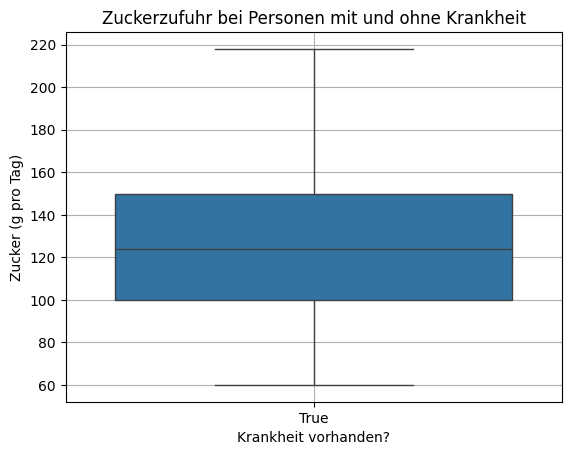

Personen mit Krankheit weisen im Median einen leicht höheren Zuckerkonsum auf.


In [ ]:
# =====================================
# Schritt 3: Explorative Analyse nach IBCS
# =====================================

# 🧠 Frage: Unterscheiden sich kranke und gesunde Personen im Zuckerkonsum?
# 🎯 Ziel: Visuelle Verteilung und Mittelwertunterschied zeigen

sns.boxplot(data=df_meals, x=df_meals["Disease_Count"] > 0, y="Sugar")
plt.title("Zuckerzufuhr bei Personen mit und ohne Krankheit")
plt.xlabel("Krankheit vorhanden?")
plt.ylabel("Zucker (g pro Tag)")
plt.grid(True)
plt.show()

# SAY-Prinzip (Kommentar zur Grafik)
print("Personen mit Krankheit weisen im Median einen leicht höheren Zuckerkonsum auf.")


In [ ]:
# 📦 Importiere notwendige Module
import os
from nbformat import read
from nbformat.validator import validate

# 📍 Definiere den vollständigen Pfad zu deinem Notebook
notebook_path = r"onlyAnalysis_Ernährung.ipynb"

# 🧪 Überprüfe, ob die Datei existiert
if not os.path.exists(notebook_path):
    print(f"⚠️ Datei nicht gefunden: {notebook_path}")
    print("Bitte überprüfen Sie den Pfad und stellen Sie sicher, dass die Datei existiert.")
    # Exit the script gracefully
    import sys
    sys.exit(1)
    # 🗂️ Zeige den absoluten Pfad der Datei
    absolute_path = os.path.abspath(notebook_path)
    print(f"📂 Absoluter Pfad der Datei: {absolute_path}")
# 📖 Öffne das Notebook und lade den Inhalt
with open(notebook_path, "r", encoding="utf-8") as f:
    nb = read(f, as_version=4)

# ✅ Validierung durchführen
validate(nb)
print("✅ Das Notebook ist gültig und im richtigen Format!")


✅ Das Notebook ist gültig und im richtigen Format!


In [ ]:
 # Ab hier macht murat was